In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



ModuleNotFoundError: No module named 'matplotlib'

Let 0 represent tails  Let 1 represent heads

In [2]:
coin_matrix = np.array([])

coin_matrix = np.random.randint(low= 0, high= 2, size=(1000,10), dtype='l')

In [3]:
coin_matrix.shape

(1000, 10)

In [4]:
pHead_matrix = np.sum(coin_matrix, axis = 1)
pHead_matrix = pHead_matrix/10

In [ ]:
c_min = np.argmin(pHead_matrix)
c_rand = np.random.randint(low= 0, high= pHead_matrix.size, dtype='l')
c_1 = 1

In [ ]:
mean = (pHead_matrix[c_1] + pHead_matrix[c_rand] + pHead_matrix[c_min])/3

In [ ]:
print(f"v1 = {pHead_matrix[c_1]} \n")
print(f"vrand = {pHead_matrix[c_rand]} \n")
print(f"vmin = {pHead_matrix[c_min]} \n")
print(f"mean = {mean} \n")


v1 = 0.4 

vrand = 0.6 

vmin = 0.0 

mean = 0.3333333333333333 



Repeating the experiment multiple times

In [ ]:
v_1_values = []
v_rand_values = []
v_min_values = []

for i in range(100000):
  coin_matrix = np.random.randint(low= 0, high= 2, size=(1000,10), dtype='l')
  pHead_matrix = np.sum(coin_matrix, axis = 1)
  pHead_matrix = pHead_matrix/10
  c_min = np.argmin(pHead_matrix)
  c_rand = np.random.randint(low= 0, high= pHead_matrix.size, dtype='l')
  c_1 = 0

  v_1_values.append(pHead_matrix[c_1])
  v_rand_values.append(pHead_matrix[c_rand])
  v_min_values.append(pHead_matrix[c_min])



In [ ]:
index = np.arange(100000)

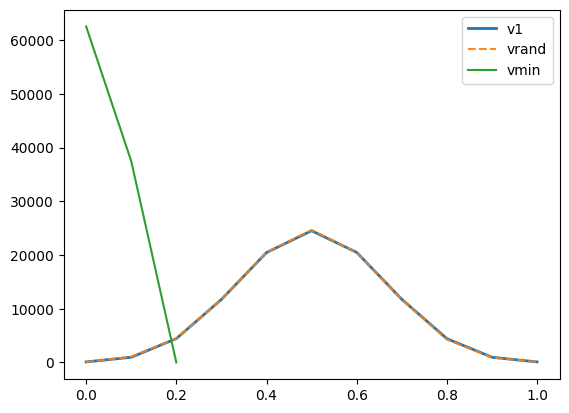

In [ ]:
v_1_unique, v_1_counts = np.unique(v_1_values, return_counts=True)
v_rand_unique, v_rand_counts = np.unique(v_rand_values, return_counts=True)
v_min_unique, v_min_counts = np.unique(v_min_values, return_counts=True)

plt.plot(v_1_unique, v_1_counts, linewidth = 2)
plt.plot(v_rand_unique, v_rand_counts, linestyle="--", alpha = 0.93)
plt.plot(v_min_unique, v_min_counts)
plt.legend(["v1","vrand","vmin"])

In [ ]:
v_1_unique, v_1_counts/100000

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0.00104, 0.00973, 0.0444 , 0.11734, 0.20458, 0.24522, 0.20492,
        0.11765, 0.04435, 0.00973, 0.00104]))

Hoeffding plot for v1

In [ ]:
v_1_counts = v_1_counts/100000
e_list  = np.arange(0,0.6,0.1)
prob_list = np.zeros(e_list.shape)
for indx,e in enumerate(e_list):
  for sz in range(v_1_unique.size):
    if abs(v_1_unique[sz] - 0.5) >= e:
      prob_list[indx] = prob_list[indx] + v_1_counts[sz]


In [ ]:
n = 10
e = np.linspace(0,0.5,50)
H_bound = 2*np.exp(-2*e*e*n)

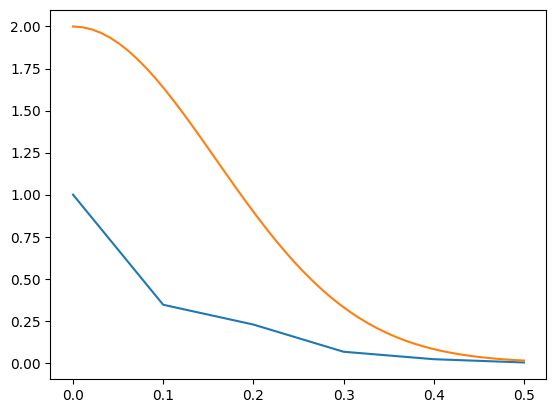

In [ ]:
plt.plot(e_list,prob_list)
plt.plot(e,H_bound)

Hoeffding plot for vrand

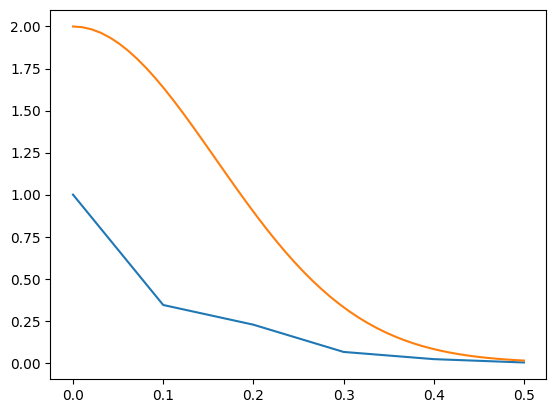

In [ ]:
v_rand_counts = v_rand_counts/100000
e_list  = np.arange(0,0.6,0.1)
prob_list = np.zeros(e_list.shape)
for indx,e in enumerate(e_list):
  for sz in range(v_rand_unique.size):
    if abs(v_rand_unique[sz] - 0.5) >= e:
      prob_list[indx] = prob_list[indx] + v_rand_counts[sz]


n = 10
e = np.linspace(0,0.5,50)
H_bound = 2*np.exp(-2*e*e*n)


plt.plot(e_list,prob_list)
plt.plot(e,H_bound)


Hoeffding plot for vmin

In [ ]:
v_min_counts, v_min_unique

(array([62533, 37466,     1]), array([0. , 0.1, 0.2]))

In [ ]:
v_min_unique = np.append(v_min_unique,[0.3],axis=0)
v_min_unique = np.append(v_min_unique,[0.4],axis=0)
v_min_unique = np.append(v_min_unique,[0.5],axis=0)
v_min_counts = np.append(v_min_counts,[0.0],axis=0)
v_min_counts = np.append(v_min_counts,[0.0],axis=0)
v_min_counts = np.append(v_min_counts,[0.0],axis=0)

In [ ]:
v_min_unique

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

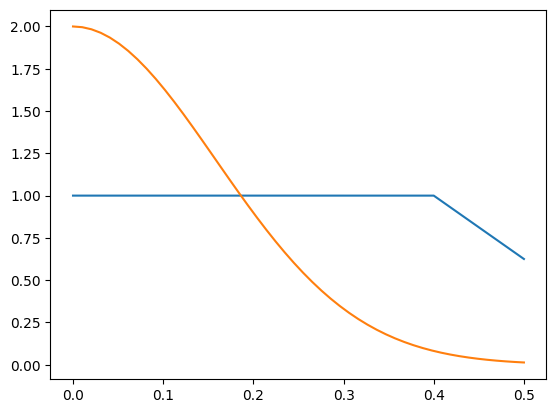

In [ ]:
v_min_counts = v_min_counts/100000
e_list  = np.arange(0,0.6,0.1)
prob_list = np.zeros(e_list.shape)
for indx,e in enumerate(e_list):
  for sz in range(v_min_unique.size):
    if abs(v_min_unique[sz] - 0.5) >= e:
      prob_list[indx] = prob_list[indx] + v_min_counts[sz]


n = 10
e = np.linspace(0,0.5,50)
H_bound = 2*np.exp(-2*e*e*n)


plt.plot(e_list,prob_list)
plt.plot(e,H_bound)


Vmin does not obey hoeffding bound